In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [2]:
def MesoNet(input_shape):
    model = Sequential()
    model.add(Conv2D(8, (3, 3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(8, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    return model


In [3]:
# Define input shape (height, width, channels)
input_shape = (224, 224, 3)

# Instantiate the model
model = MesoNet(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [5]:
# Define data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'D:\\Deepfake\\dataset\\real_vs_fake\\real-vs-fake\\train',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'D:\\Deepfake\\dataset\\real_vs_fake\\real-vs-fake\\valid',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        'D:\\Deepfake\\dataset\\real_vs_fake\\real-vs-fake\\test',
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='binary')

# Train the model
history = model.fit(
        train_generator,
        steps_per_epoch=len(train_generator),
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(
        test_generator,
        steps=len(test_generator))
print('Test accuracy:', test_acc)


Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Epoch 1/10


3125/3125 [==============================] - 7077s 2s/step - loss: 0.4635 - accuracy: 0.7774 - val_loss: 0.2792 - val_accuracy: 0.8864
Epoch 2/10
3125/3125 [==============================] - 5697s 2s/step - loss: 0.2623 - accuracy: 0.8935 - val_loss: 0.1974 - val_accuracy: 0.9211
Epoch 3/10
3125/3125 [==============================] - 3832s 1s/step - loss: 0.1829 - accuracy: 0.9272 - val_loss: 0.1668 - val_accuracy: 0.9355
Epoch 4/10
3125/3125 [==============================] - 6189s 2s/step - loss: 0.1403 - accuracy: 0.9452 - val_loss: 0.1604 - val_accuracy: 0.9405
Epoch 5/10
3125/3125 [==============================] - 2129s 681ms/step - loss: 0.1149 - accuracy: 0.9550 - val_loss: 0.1359 - val_accuracy: 0.9503
Epoch 6/10
3125/3125 [==============================] - 1934s 619ms/step - loss: 0.0968 - accuracy: 0.9620 - val_loss: 0.1330 - val_acc

In [6]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [7]:
# Generate predictions
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred)


625/625 [==============================] - 495s 790ms/step


In [8]:
# Get true labels
y_true = test_generator.classes

In [9]:

# Calculate precision, recall, F1-score, support
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     10000
           1       0.50      0.49      0.49     10000

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



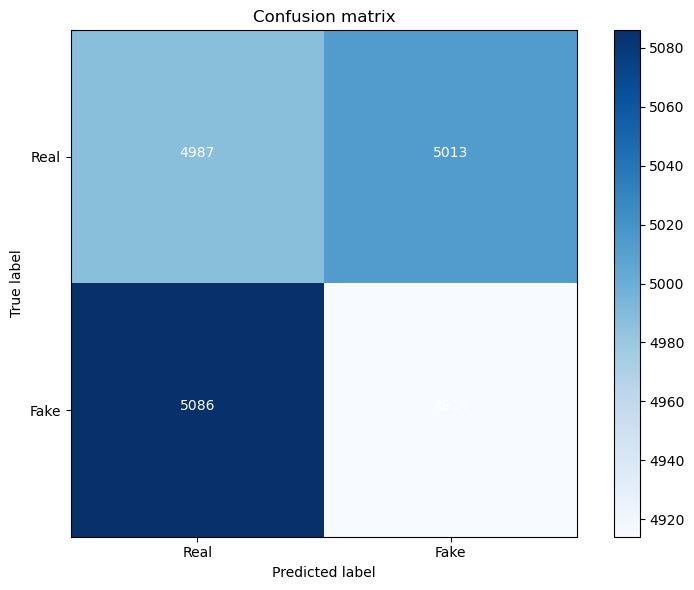

In [10]:

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xticks(np.arange(2), ['Real', 'Fake'])
plt.yticks(np.arange(2), ['Real', 'Fake'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()
